In [ ]:
# Clone YOLOv code
!git clone https://github.com/WongKinYiu/yolov7
%cd yolov7


Cloning into 'yolov7'...
remote: Enumerating objects: 1130, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 1130 (delta 0), reused 1 (delta 0), pack-reused 1127
Receiving objects: 100% (1130/1130), 69.93 MiB | 27.34 MiB/s, done.
Resolving deltas: 100% (522/522), done.
/content/yolov7


In [ ]:
ls

cfg/       export.py   LICENSE.md  requirements.txt  train_aux.py
data/      figure/     models/     scripts/          train.py
deploy/    hubconf.py  paper/      test.py           utils/
detect.py  inference/  README.md   tools/


In [ ]:
!pip install -r ./requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.4 MB/s eta 0:00:00


In [ ]:
ls

cfg/       export.py   LICENSE.md  requirements.txt  train_aux.py
data/      figure/     models/     scripts/          train.py
deploy/    hubconf.py  paper/      test.py           utils/
detect.py  inference/  README.md   tools/


In [ ]:
pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import pytesseract as pt
import plotly.express as px
import matplotlib.pyplot as plt
import xml.etree.ElementTree as xet

from glob import glob
from skimage import io
from shutil import copy
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls /content/gdrive/MyDrive/

 11.PNG
 12.PNG
 800px-Happy_new_year_02.svg.png
 800px-Happy_new_year_ffcc00ff.svg.png
'800px-Prague_New_Year_2016_fireworks._Happy_New_Year!_(23741249829).jpg'
'9120 (1).jpg'
 9120.jpg
 Ablehnungsbescheid.pdf
'Account Statement.pdf'
 arangu1
 arangu2
 barcode.png
 Bewertungsschema_und_CCL_V12_20181128.pdf
 cars
 Classroom
 Cogs
'Colab Notebooks'
'Copy of CV_Rony.pdf'
'Copy of P_20150930_145201.jpg'
'Copy of Transcript.pdf'
'D 090476.pdf'
'[Downloadr.in] Udacity - Self-Driving Car Engineer v1.0.0.rar'
 Drive
'Family Photos'
 farewel
'First Resignation letter.jpg'
 _Getintopc.com_Bandicam_4.6.4.1728.rar
 happy-4488259_1920.jpg
 happy-new-year-2020-4727092_1920.png
'Happy New Year 2022 Countdown.jpg'
 home-5860542_1920.jpg
'How to get started with Drive.pdf'
 IJETT-V45P212.pdf
 iLovePDF
 images.zip
'IMG_rvfdzw (1).jpg'
 IMG_rvfdzw.jpg
'INCOME TAX DEPARTMENT.pdf'
 Investigation_of_Influence_from_Variation_in_Color_on_LiDAR_Sensor_for_Perception_of_Environment_in_Autonomous_Vehicles.pdf
 

In [ ]:
!unzip /content/gdrive/MyDrive/images.zip

Archive:  /content/gdrive/MyDrive/images.zip
   creating: images/
  inflating: images/N1.jpeg          
  inflating: images/N1.xml           
  inflating: images/N100.jpeg        
  inflating: images/N100.xml         
  inflating: images/N101.jpeg        
  inflating: images/N101.xml         
  inflating: images/N102.jpeg        
  inflating: images/N102.xml         
  inflating: images/N103.jpeg        
  inflating: images/N103.xml         
  inflating: images/N104.jpeg        
  inflating: images/N104.xml         
  inflating: images/N105.jpeg        
  inflating: images/N105.xml         
  inflating: images/N106.jpeg        
  inflating: images/N106.xml         
  inflating: images/N107.jpeg        
  inflating: images/N107.xml         
  inflating: images/N108.jpeg        
  inflating: images/N108.xml         
  inflating: images/N109.jpeg        
  inflating: images/N109.xml         
  inflating: images/N11.jpeg         
  inflating: images/N11.xml          
  inflating: images/N1

In [ ]:
ls

cfg/       export.py   inference/  README.md         tools/
data/      figure/     LICENSE.md  requirements.txt  train_aux.py
deploy/    hubconf.py  models/     scripts/          train.py
detect.py  images/     paper/      test.py           utils/


In [ ]:
path = glob('images/*.xml')
print(path)
labels_dict = dict(filepath=[],xmin=[],xmax=[],ymin=[],ymax=[])
for filename in path:
    info = xet.parse(filename)
    root = info.getroot()
    member_object = root.find('object')
    labels_info = member_object.find('bndbox')
    xmin = int(labels_info.find('xmin').text)
    xmax = int(labels_info.find('xmax').text)
    ymin = int(labels_info.find('ymin').text)
    ymax = int(labels_info.find('ymax').text)

    labels_dict['filepath'].append(filename)
    labels_dict['xmin'].append(xmin)
    labels_dict['xmax'].append(xmax)
    labels_dict['ymin'].append(ymin)
    labels_dict['ymax'].append(ymax)

['images/N233.xml', 'images/N136.xml', 'images/N128.xml', 'images/N177.xml', 'images/N100.xml', 'images/N216.xml', 'images/N75.xml', 'images/N116.xml', 'images/N200.xml', 'images/N242.xml', 'images/N27.xml', 'images/N51.xml', 'images/N62.xml', 'images/N5.xml', 'images/N151.xml', 'images/N91.xml', 'images/N84.xml', 'images/N49.xml', 'images/N1.xml', 'images/N65.xml', 'images/N6.xml', 'images/N138.xml', 'images/N140.xml', 'images/N166.xml', 'images/N208.xml', 'images/N17.xml', 'images/N209.xml', 'images/N117.xml', 'images/N7.xml', 'images/N168.xml', 'images/N93.xml', 'images/N178.xml', 'images/N34.xml', 'images/N32.xml', 'images/N158.xml', 'images/N244.xml', 'images/N92.xml', 'images/N97.xml', 'images/N108.xml', 'images/N109.xml', 'images/N122.xml', 'images/N3.xml', 'images/N121.xml', 'images/N188.xml', 'images/N191.xml', 'images/N229.xml', 'images/N69.xml', 'images/N38.xml', 'images/N195.xml', 'images/N43.xml', 'images/N222.xml', 'images/N160.xml', 'images/N171.xml', 'images/N131.xml', 

In [ ]:
df = pd.DataFrame(labels_dict)
df.to_csv('labels.csv',index=False)
df.head(226)

,filepath,xmin,xmax,ymin,ymax
0,images/N233.xml,99,223,20,50
1,images/N136.xml,787,910,473,513
2,images/N128.xml,58,221,198,271
3,images/N177.xml,331,538,263,317
4,images/N100.xml,134,301,312,350
...,...,...,...,...,...
220,images/N99.xml,158,389,129,193
221,images/N163.xml,230,316,203,231
222,images/N223.xml,69,585,79,183
223,images/N210.xml,143,337,210,254


In [ ]:
filename = df['filepath'][0]
def getFilename(filename):
    filename_image = xet.parse(filename).getroot().find('filename').text
    filepath_image = os.path.join('./images',filename_image)
    return filepath_image
getFilename(filename)

'./images/N233.jpeg'

In [ ]:
df['filepath'][0]

'images/N233.xml'

In [ ]:
image_path = list(df['filepath'].apply(getFilename))
print(len(image_path))
image_path[:2]#random check

225


['./images/N233.jpeg', './images/N136.jpeg']

In [ ]:
ls

cfg/       export.py   inference/  paper/            test.py       utils/
data/      figure/     labels.csv  README.md         tools/
deploy/    hubconf.py  LICENSE.md  requirements.txt  train_aux.py
detect.py  images/     models/     scripts/          train.py


./images/N86.jpeg



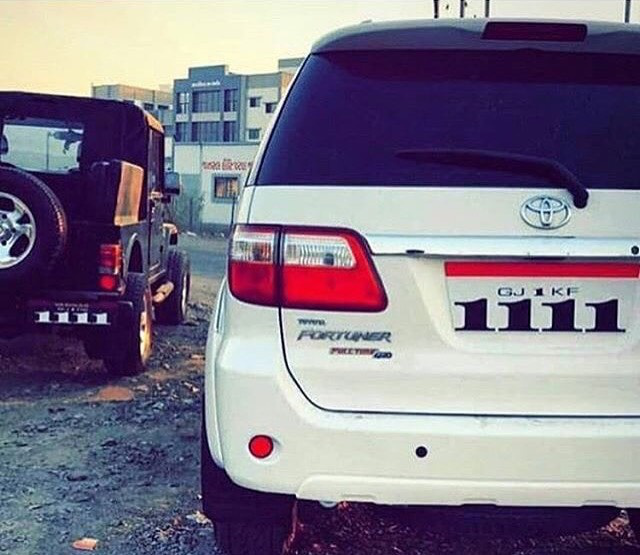

In [ ]:
file_path = image_path[87] #path of our image N2.jpeg
print(file_path)
img = cv2.imread(file_path) #read the image
# xmin-1804/ymin-1734/xmax-2493/ymax-1882 
img = io.imread(file_path) 
#Read the image
fig = px.imshow(img)
fig.update_layout(width=600, height=500, margin=dict(l=10, r=10, b=10, t=10),xaxis_title='Figure 8 - N2.jpeg with bounding box')
fig.add_shape(type='rect',x0=543, x1=769, y0=390, y1=461, xref='x', yref='y',line_color='cyan')

In [ ]:
# parsing
def parsing(path):
    parser = xet.parse(path).getroot()
    name = parser.find('filename').text
    filename = f'images/{name}'

    # width and height
    parser_size = parser.find('size')
    width = int(parser_size.find('width').text)
    height = int(parser_size.find('height').text)
    
    return filename, width, height
df[['filename','width','height']] = df['filepath'].apply(parsing).apply(pd.Series)
df.head()

,filepath,xmin,xmax,ymin,ymax,filename,width,height
0,images/N233.xml,99,223,20,50,images/N233.jpeg,320,180
1,images/N136.xml,787,910,473,513,images/N136.jpeg,1632,918
2,images/N128.xml,58,221,198,271,images/N128.jpeg,500,399
3,images/N177.xml,331,538,263,317,images/N177.jpeg,850,681
4,images/N100.xml,134,301,312,350,images/N100.jpeg,450,417


In [ ]:
# center_x, center_y, width , height
df['center_x'] = (df['xmax'] + df['xmin'])/(2*df['width'])
df['center_y'] = (df['ymax'] + df['ymin'])/(2*df['height'])

df['bb_width'] = (df['xmax'] - df['xmin'])/df['width']
df['bb_height'] = (df['ymax'] - df['ymin'])/df['height']
df.head()

,filepath,xmin,xmax,ymin,ymax,filename,width,height,center_x,center_y,bb_width,bb_height
0,images/N233.xml,99,223,20,50,images/N233.jpeg,320,180,0.503125,0.194444,0.387500,0.166667
1,images/N136.xml,787,910,473,513,images/N136.jpeg,1632,918,0.519914,0.537037,0.075368,0.043573
2,images/N128.xml,58,221,198,271,images/N128.jpeg,500,399,0.279000,0.587719,0.326000,0.182957
3,images/N177.xml,331,538,263,317,images/N177.jpeg,850,681,0.511176,0.425844,0.243529,0.079295
4,images/N100.xml,134,301,312,350,images/N100.jpeg,450,417,0.483333,0.793765,0.371111,0.091127


In [ ]:
ls

cfg/       export.py   inference/  paper/            test.py       utils/
data/      figure/     labels.csv  README.md         tools/
deploy/    hubconf.py  LICENSE.md  requirements.txt  train_aux.py
detect.py  images/     models/     scripts/          train.py


In [ ]:
mkdir train


In [ ]:
mkdir test

In [ ]:
mkdir val

In [ ]:
cd train

/content/yolov7/train


In [ ]:
mkdir images

In [ ]:
mkdir labels

In [ ]:
cd ..


/content/yolov7


In [ ]:
cd test

/content/yolov7/test


In [ ]:
mkdir images

In [ ]:
mkdir labels

In [ ]:
cd ..

/content/yolov7


In [ ]:
cd val

/content/yolov7/val


In [ ]:
mkdir images

In [ ]:
mkdir labels

In [ ]:
cd ..

/content/yolov7


In [ ]:
ls

cfg/       export.py   inference/  paper/            test/    train_aux.py
data/      figure/     labels.csv  README.md         test.py  train.py
deploy/    hubconf.py  LICENSE.md  requirements.txt  tools/   utils/
detect.py  images/     models/     scripts/          train/   val/


In [ ]:
df_train = df.iloc[:181]
df_test = df.iloc[181:204]
df_val = df.iloc[204:]

In [ ]:
df_test.head(100)

,filepath,xmin,xmax,ymin,ymax,filename,width,height,center_x,center_y,bb_width,bb_height
181,images/N226.xml,142,343,253,304,images/N226.jpeg,500,430,0.485000,0.647674,0.402000,0.118605
182,images/N101.xml,31,139,128,161,images/N101.jpeg,249,239,0.341365,0.604603,0.433735,0.138075
183,images/N219.xml,1,300,92,154,images/N219.jpeg,300,225,0.501667,0.546667,0.996667,0.275556
184,images/N104.xml,66,154,166,197,images/N104.jpeg,377,244,0.291777,0.743852,0.233422,0.127049
185,images/N37.xml,77,200,231,290,images/N37.jpeg,728,485,0.190247,0.537113,0.168956,0.121649
186,images/N72.xml,186,325,177,212,images/N72.jpeg,500,372,0.511000,0.522849,0.278000,0.094086
187,images/N98.xml,563,675,207,238,images/N98.jpeg,704,330,0.879261,0.674242,0.159091,0.093939
188,images/N184.xml,229,1391,204,660,images/N184.jpeg,1512,825,0.535714,0.523636,0.768519,0.552727
189,images/N155.xml,145,313,167,201,images/N155.jpeg,424,249,0.540094,0.738956,0.396226,0.136546
190,images/N23.xml,107,201,264,288,images/N23.jpeg,640,425,0.240625,0.649412,0.146875,0.056471


In [ ]:
ls

cfg/       export.py   inference/  paper/            test/    train_aux.py
data/      figure/     labels.csv  README.md         test.py  train.py
deploy/    hubconf.py  LICENSE.md  requirements.txt  tools/   utils/
detect.py  images/     models/     scripts/          train/   val/


In [ ]:
print('getcwd:', os.getcwd())

train_folder = 'train/images/'
train_label_folder = 'train/labels/'

values = df_train[['filename','center_x','center_y','bb_width','bb_height']].values

for fname, x,y, w, h in values:
    image_name = os.path.split(fname)[-1]
    txt_name = os.path.splitext(image_name)[0]
    
    dst_image_path = os.path.join(train_folder,image_name)
    dst_label_file = os.path.join(train_label_folder,txt_name+'.txt')
    # copy each image into the folder
    
 
    copy(fname,dst_image_path)

    # generate .txt which has label info
    label_txt = f'0 {x} {y} {w} {h}'
    with open(dst_label_file,mode='w') as f:
        f.write(label_txt)
        
        f.close()



getcwd: /content/yolov7


In [ ]:
test_folder = 'test/images/'
test_label_folder = 'test/labels'


values = df_test[['filename','center_x','center_y','bb_width','bb_height']].values

for fname, x,y, w, h in values:
    image_name = os.path.split(fname)[-1]
    txt_name = os.path.splitext(image_name)[0]
    
    dst_image_path = os.path.join(test_folder,image_name)
    dst_label_file = os.path.join(test_label_folder,txt_name+'.txt')
    # copy each image into the folder
    
 
    copy(fname,dst_image_path)

    # generate .txt which has label info
    label_txt = f'0 {x} {y} {w} {h}'
    with open(dst_label_file,mode='w') as f:
        f.write(label_txt)
        
        f.close()


In [ ]:
val_folder = 'val/images/'
val_label_folder = 'val/labels'


values = df_val[['filename','center_x','center_y','bb_width','bb_height']].values

for fname, x,y, w, h in values:
    image_name = os.path.split(fname)[-1]
    txt_name = os.path.splitext(image_name)[0]
    
    dst_image_path = os.path.join(val_folder,image_name)
    dst_label_file = os.path.join(val_label_folder,txt_name+'.txt')
    # copy each image into the folder
    
 
    copy(fname,dst_image_path)

    # generate .txt which has label info
    label_txt = f'0 {x} {y} {w} {h}'
    with open(dst_label_file,mode='w') as f:
        f.write(label_txt)
        
        f.close()


In [ ]:
import shutil
shutil.copy("/content/gdrive/MyDrive/yolov7-num.yaml", "/content/yolov7/cfg/training")
shutil.copy("/content/gdrive/MyDrive/licenseplate.yaml", "/content/yolov7/data")
shutil.copy("/content/gdrive/MyDrive/yolov7-e6e.pt", "/content/yolov7")

'/content/yolov7/yolov7-e6e.pt'

In [ ]:
!pip install GPUtil

import torch
from GPUtil import showUtilization as gpu_usage
from numba import cuda

def free_gpu_cache():
    print("Initial GPU Usage")
    gpu_usage()                             

    torch.cuda.empty_cache()

    cuda.select_device(0)
    cuda.close()
    cuda.select_device(0)

    print("GPU Usage after emptying the cache")
    gpu_usage()

free_gpu_cache()  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7409 sha256=0dc2ba56beff573257c3ee64e2916128b8f90fc64004a903eab1f8ae5b0cf3d1
  Stored in directory: /root/.cache/pip/wheels/ba/03/bb/7a97840eb54479b328672e15a536e49dc60da200fb21564d53
Successfully built GPUtil
Initial GPU Usage
| ID | GPU | MEM |
------------------
|  0 |  0% |  0% |
GPU Usage after emptying the cache
| ID | GPU | MEM |
------------------
|  0 |  4% |  1% |


In [ ]:
!python train.py --weights yolov7-e6e.pt --data data/licenseplate.yaml --cfg cfg/training/yolov7-num.yaml --batch-size 8 --name Model --epochs 100


YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15101.8125MB)

Namespace(adam=False, artifact_alias='latest', batch_size=8, bbox_interval=-1, bucket='', cache_images=False, cfg='cfg/training/yolov7-num.yaml', data='data/licenseplate.yaml', device='', entity=None, epochs=100, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='data/hyp.scratch.p5.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='Model', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/Model', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=8, upload_dataset=False, v5_metric=False, weights='yolov7-e6e.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2023-03-07 07:54:22.323985: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] C

In [ ]:
!python detect.py --weights runs/train/Model/weights/best.pt --conf 0.4 --img-size 640 --source test/images --no-trace

In [ ]:
import glob
from IPython.display import Image,display

i=0
limit = 100
for imageName in glob.glob('/runs/detect/exp/*.jpeg'):
  if i < limit:
    display(Image(filename=imageName))
    print('\n')
  i = i+1 

